### Import Libreries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import statsmodels.formula.api as sfa
pd.set_option('display.max_rows', None)
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
import warnings
warnings.filterwarnings("ignore")

### Loading the Dataset

In [4]:
df=pd.read_csv("Basketball.csv")
df.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [5]:
df.shape

(61, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


### Cleaning the dataset

1. Team Launch columns in the data set has many unwanted varibles other than the year in which the team was launched. So we have to fetch only the year in which the team was started using string split from the pandas librery

In [7]:
df["TeamLaunch"]=df["TeamLaunch"].str.split("to|-|_|~",expand=True).iloc[:,0]

In [8]:
df

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1
6,Team 7,82,2792,2626,948,608,1070,3609,3889,-,-,1929,3
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1
8,Team 9,58,2109,1986,698,522,766,2683,2847,-,1,1939,2
9,Team 10,51,1884,1728,606,440,682,2159,2492,1,-,1932,1


* Now the Team Launch column only have the year in which the team was started

2. The missing values in the dataset are filled with "-".First needs to be replaced as Nan values to know how much of the values in the dataset are missing values

In [9]:
df.replace("-",np.nan,inplace=True)
df

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1
6,Team 7,82,2792,2626,948,608,1070,3609,3889,NaN,NaN,1929,3
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1
8,Team 9,58,2109,1986,698,522,766,2683,2847,NaN,1,1939,2
9,Team 10,51,1884,1728,606,440,682,2159,2492,1,NaN,1932,1


### Missing value Treatment

In [10]:
df.isnull().sum()

Team                    0
Tournament              0
Score                   1
PlayedGames             1
WonGames                1
DrawnGames              1
LostGames               1
BasketScored            1
BasketGiven             1
TournamentChampion     52
Runner-up              48
TeamLaunch              0
HighestPositionHeld     0
dtype: int64

3. From the above we can know that there are 52 missing value in the TournamentChampion column,48 missing value in the Runner-up column and 1 missing value each in Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored and BasketGiven columns. The missing value in the columns TournamentChampion and Runner-up can be replace with 0 because the TournamentChampion columns says how many times a team have won the championship and Runner-up columns says how many times a team have come in the runner up position. From the column HighestPositionHeld (the highest position a team has held) the null values present in these two columns say that the particular team has never won a championship or never finished in the second position

In [11]:
df[["TournamentChampion","Runner-up"]]=df[["TournamentChampion","Runner-up"]].fillna("0")

In [12]:
df

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1
6,Team 7,82,2792,2626,948,608,1070,3609,3889,0,0,1929,3
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1
8,Team 9,58,2109,1986,698,522,766,2683,2847,0,1,1939,2
9,Team 10,51,1884,1728,606,440,682,2159,2492,1,0,1932,1


### Dropping unwanted rows and columns

##### There are few columns which are not helping to do the statistical analysics. So we can drop those columns. But before droping those columns.

4. As most of the value in the row no 61 is missing we can drop that row

In [13]:
df.drop(index=60,inplace=True)

In [14]:
df

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1
6,Team 7,82,2792,2626,948,608,1070,3609,3889,0,0,1929,3
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1
8,Team 9,58,2109,1986,698,522,766,2683,2847,0,1,1939,2
9,Team 10,51,1884,1728,606,440,682,2159,2492,1,0,1932,1


5. As the team column is a unique identifier we can drop the team column for now.But before dropping in we need to save it in a seperate variable first

In [15]:
team = df["Team"]

In [16]:
df.drop("Team",axis=1,inplace=True)

6. As the variance of TeamLaunch columns is very high we can drop that column for now

In [17]:
df.drop("TeamLaunch",axis=1,inplace=True)

In [18]:
df.columns

Index(['Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames',
       'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion',
       'Runner-up', 'HighestPositionHeld'],
      dtype='object')

### Changing Data type

6. The data types of the columns('Score', 'PlayedGames', 'WonGames', 'DrawnGames','LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion','Runner-up', 'TeamLaunch') are not matching their value. So we have to change the data types of these columns.

In [19]:
df.iloc[:,1:]=df.iloc[:,1:].apply(pd.to_numeric)

7. Since Highest Position Held is the highest rank a team has ever finished it can be considered a categorical column

In [20]:
df["HighestPositionHeld"]=df["HighestPositionHeld"].astype(object)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Tournament           60 non-null     int64 
 1   Score                60 non-null     int64 
 2   PlayedGames          60 non-null     int64 
 3   WonGames             60 non-null     int64 
 4   DrawnGames           60 non-null     int64 
 5   LostGames            60 non-null     int64 
 6   BasketScored         60 non-null     int64 
 7   BasketGiven          60 non-null     int64 
 8   TournamentChampion   60 non-null     int64 
 9   Runner-up            60 non-null     int64 
 10  HighestPositionHeld  60 non-null     object
dtypes: int64(10), object(1)
memory usage: 5.3+ KB


### Checking for outliers

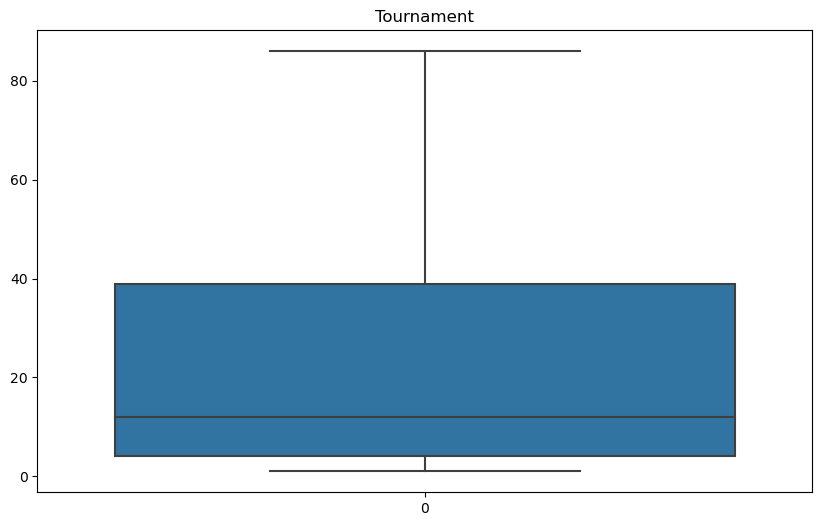

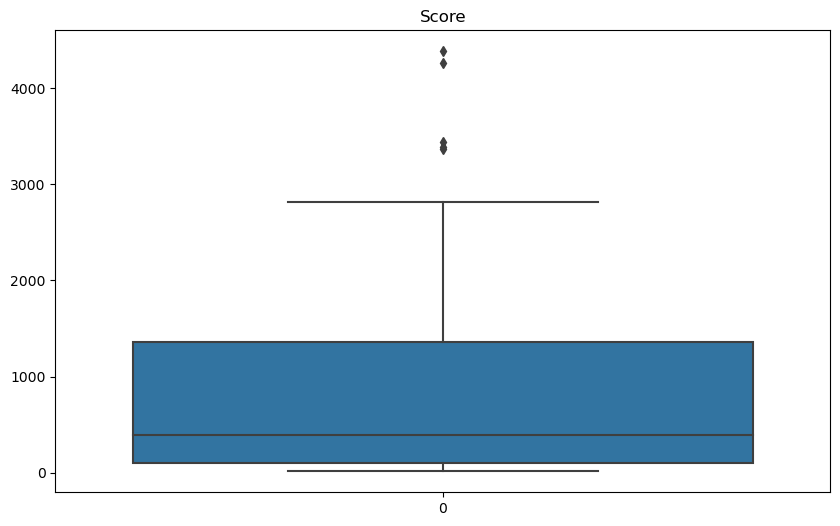

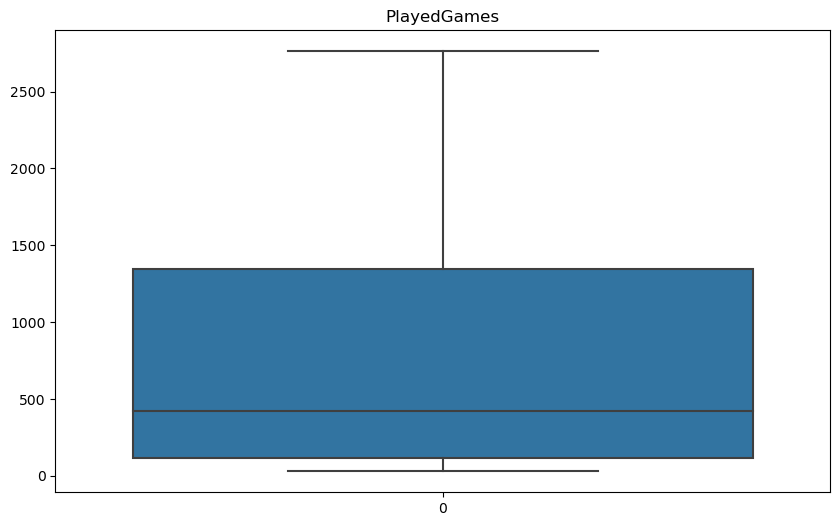

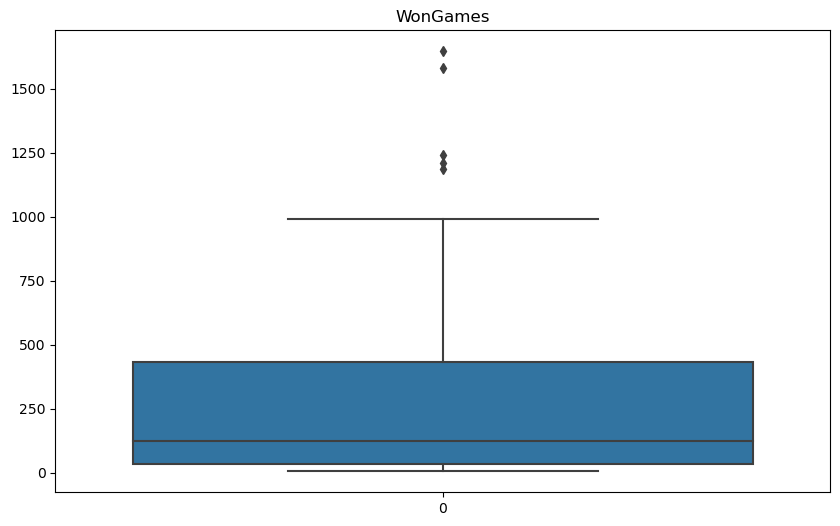

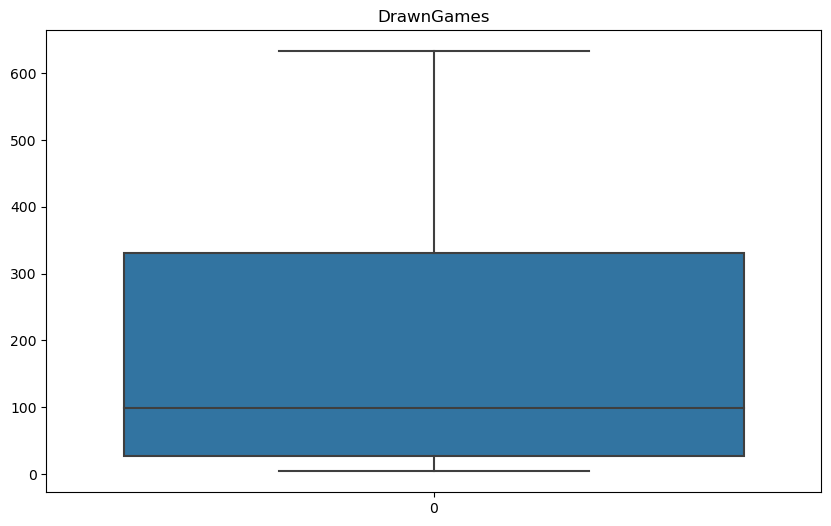

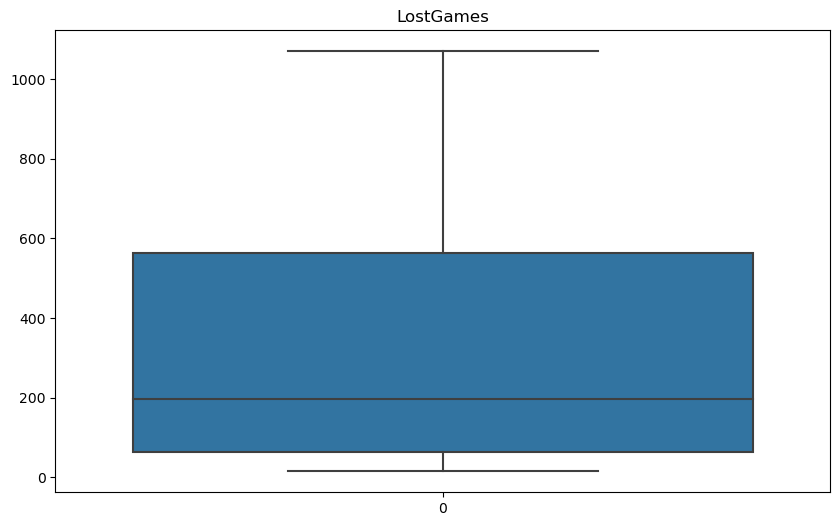

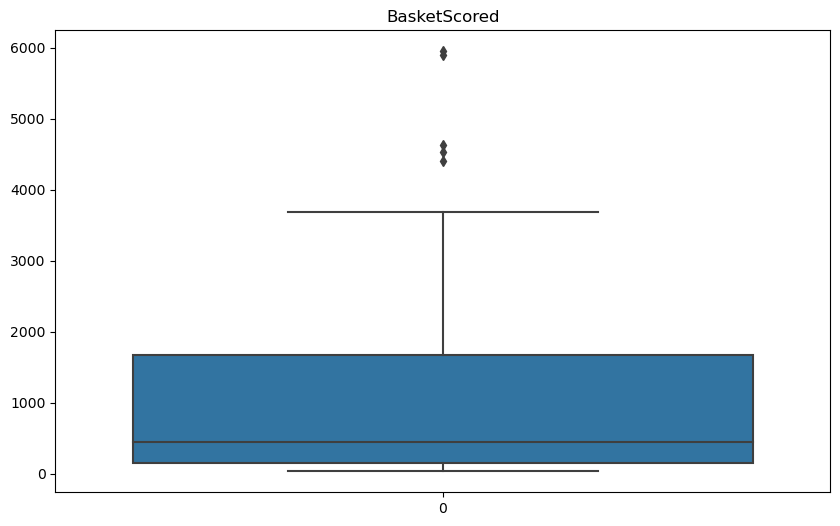

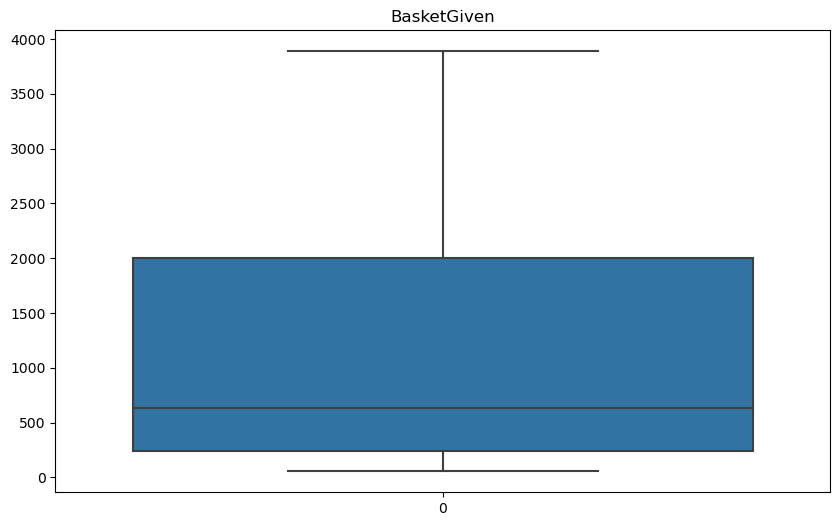

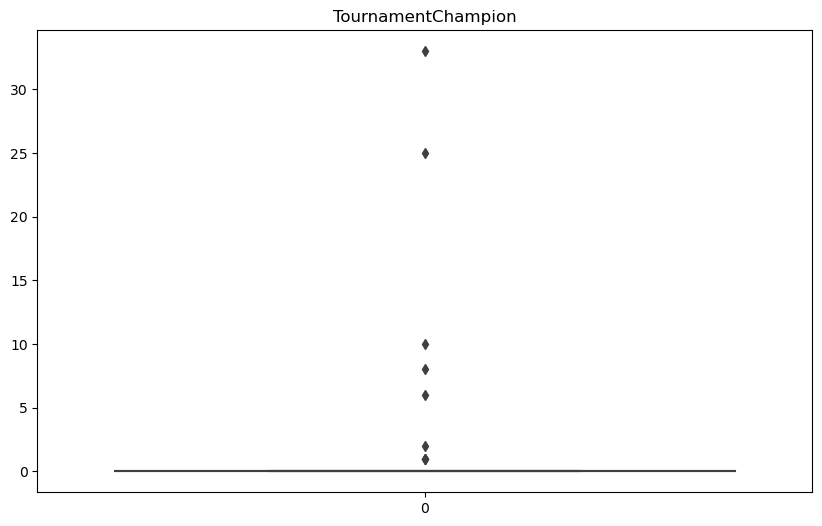

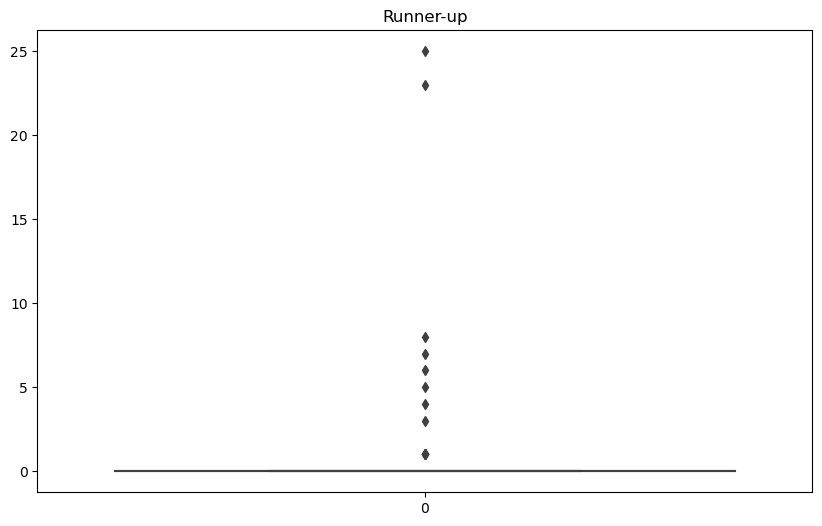

In [30]:
for i in df.select_dtypes(include=np.number).columns:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()  

* There are few outliers in the score,Won games,Basket scored columns
* And there are many outlier in the Tournament champion and Runner up columns because Team 1 and Team 2 have won most of the tournament or finished in the second position maximum times
* And from the 61 team just 9 teams have won the tournament and only 13 teams have finished in the second position so far.

# EDA

Performing a detailed statistical analysis and exploratory data analysis (EDA) on the provided dataset can help us derive valuable insights and recommendations for the association. To approach this, we'll conduct univariate, bivariate, and multivariate analyses to assess team performance. After the analysis, we'll also provide suggestions for improving data quality, quantity, variety, velocity, and veracity.

## Univariant analysis

Descriptive statistics like mean, median, and standard deviation for key variables such as "Score," "PlayedGames," "WonGames," and "BasketScored" can provide insights into the central tendency and dispersion of the data.
Visualizations such as histograms and box plots can reveal the distribution and identify outliers.
Determine the teams with the highest and lowest performance in terms of different metrics.

###### Numerical columns

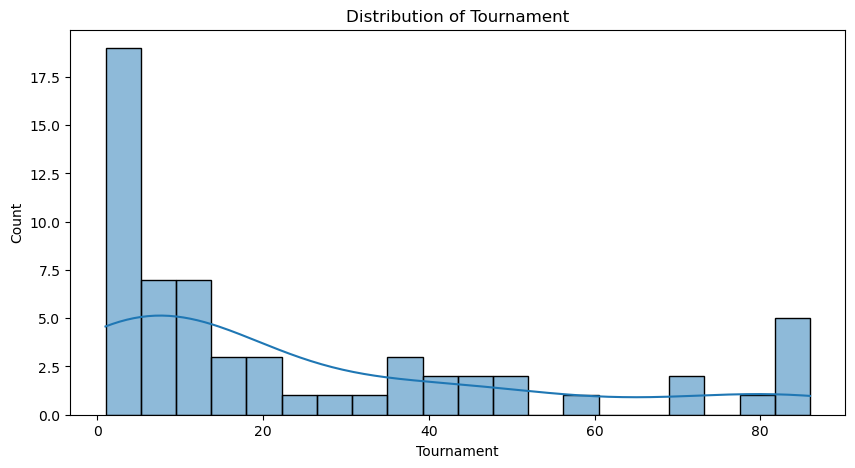

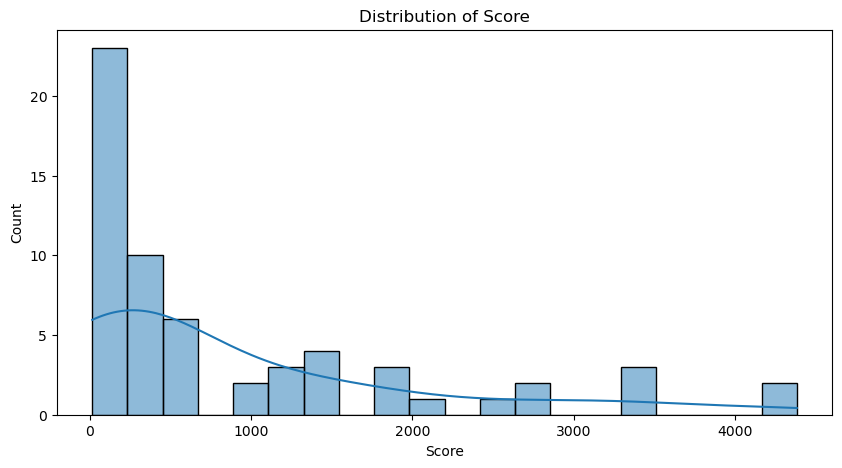

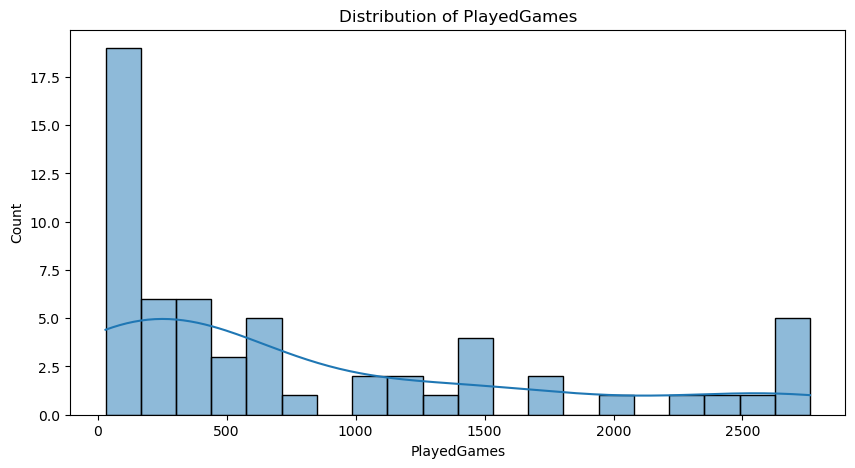

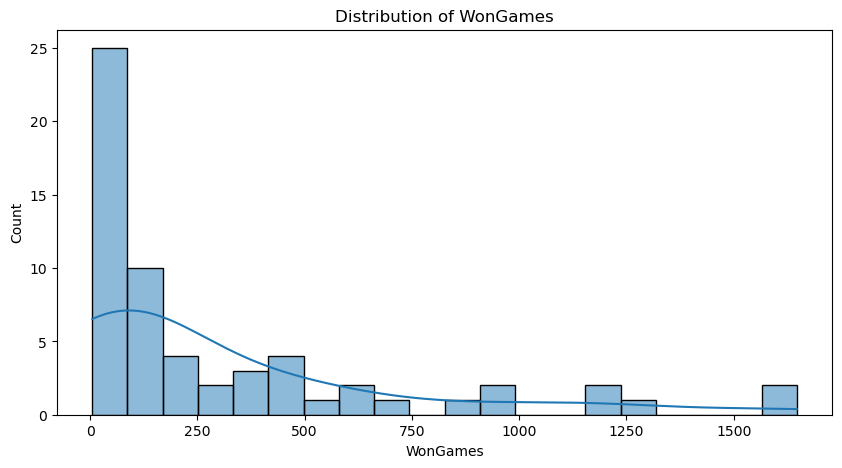

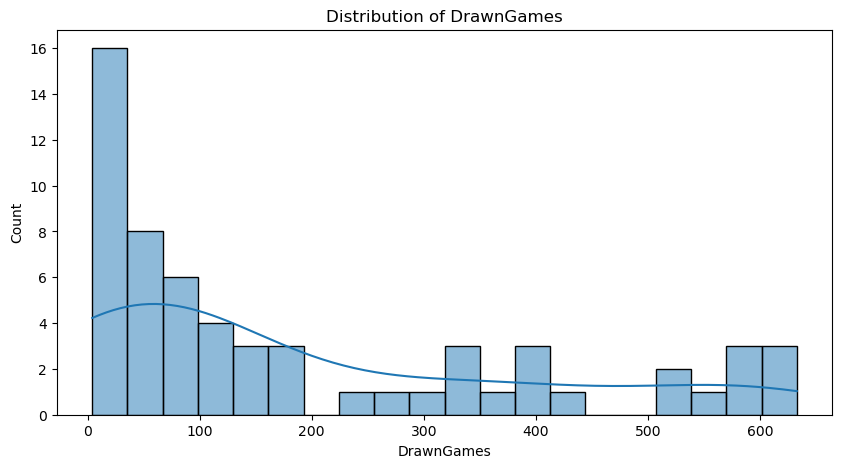

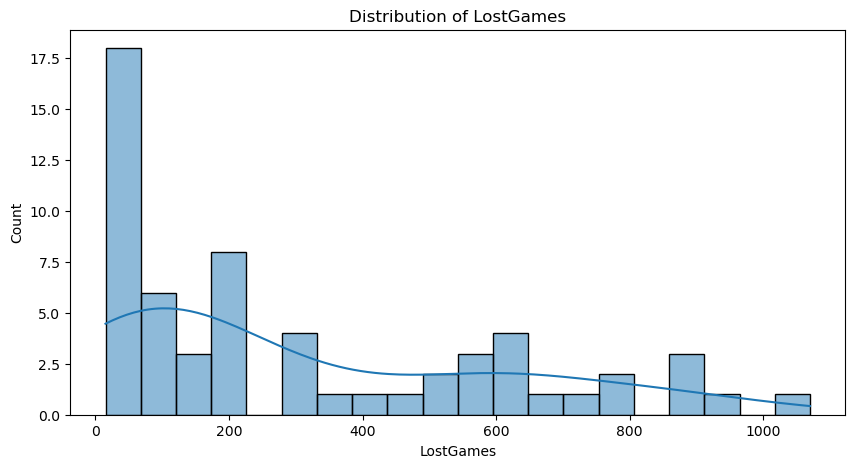

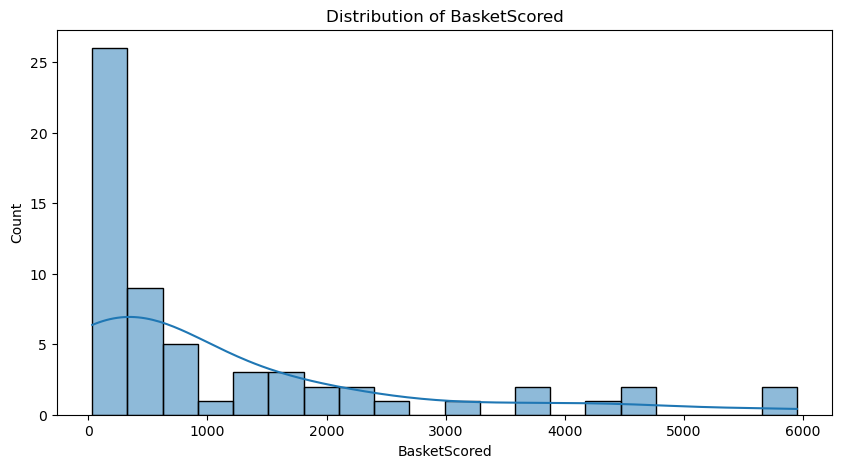

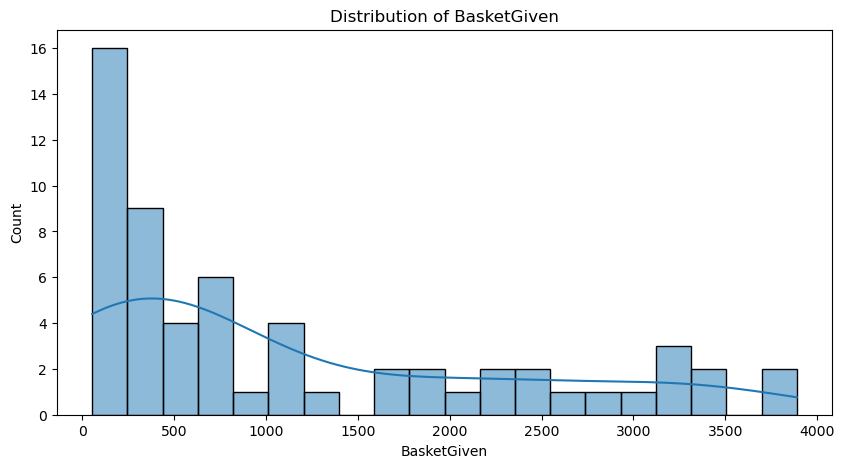

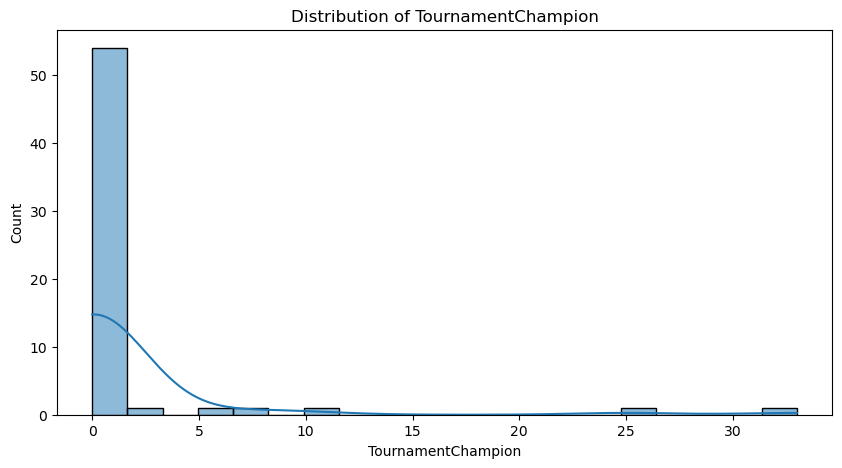

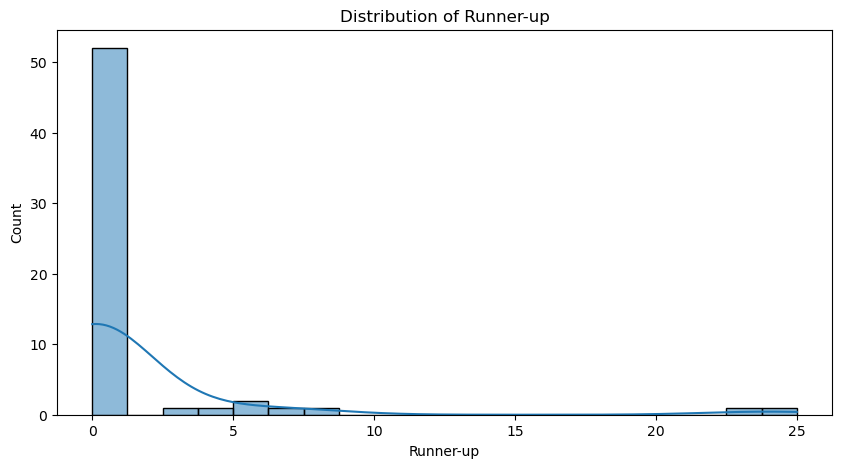

In [120]:
for i in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[i], bins=20, kde=True)
    plt.title("Distribution of "+i)
    plt.xlabel(i)
    plt.show()

* We can see that most of the data is accumulated to one side as we see that from the given data only few teams are dominating the tournament

###### Categorical columns

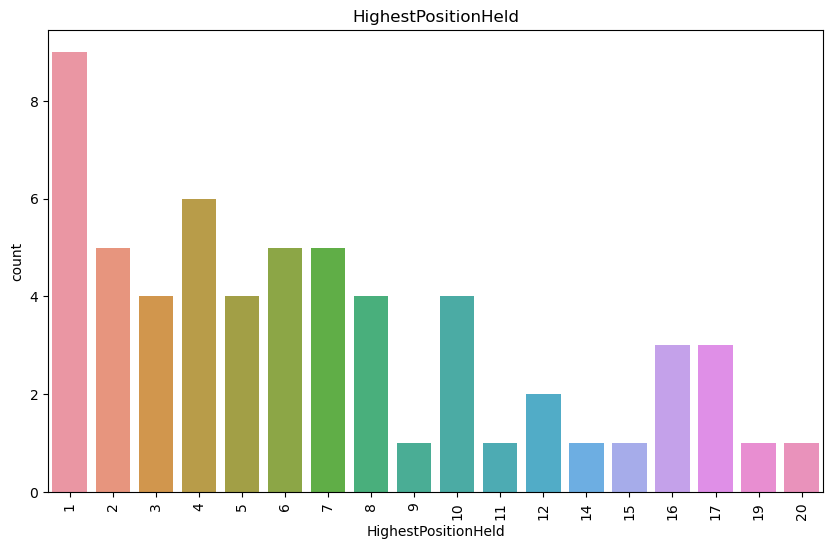

In [121]:
for i in df.select_dtypes(include=object).columns:
    sns.countplot(x=df[i])
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

1. From the above plot we can say
 * Comparing the other years most teams are launched in the year 1929.
 * And maximum number of teams have atleast finished in the top ten positions.

## Bivariate Analysis

* Scatter plots and correlation coefficients can help identify relationships between variables. For example, we can assess the correlation between "Score" and "BasketScored" to see if teams that score more also have a higher number of baskets.
* Analyze the performance of champions and runners-up over the years to identify any trends.

###### Here we are considering the column TournamentChampion as the target column

In [122]:
a = ['Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames','LostGames', 'BasketScored', 'BasketGiven','Runner-up']

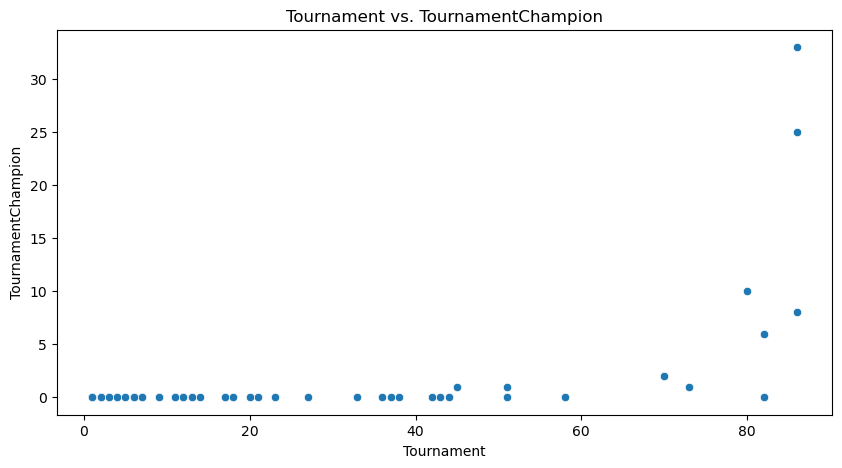

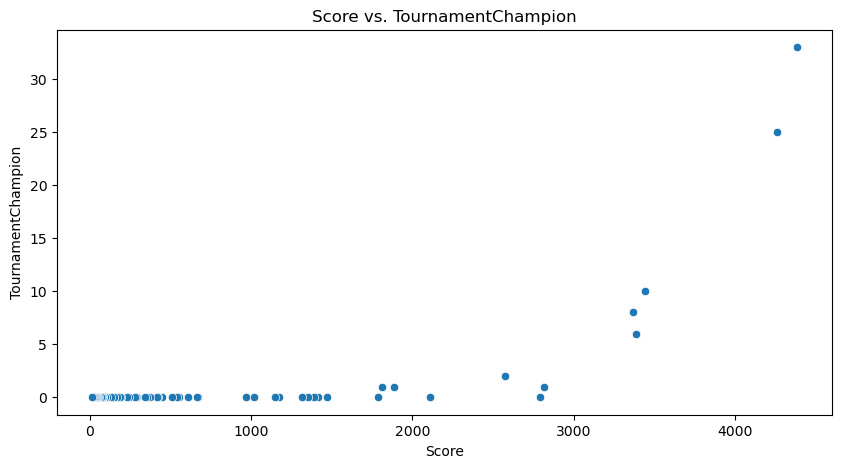

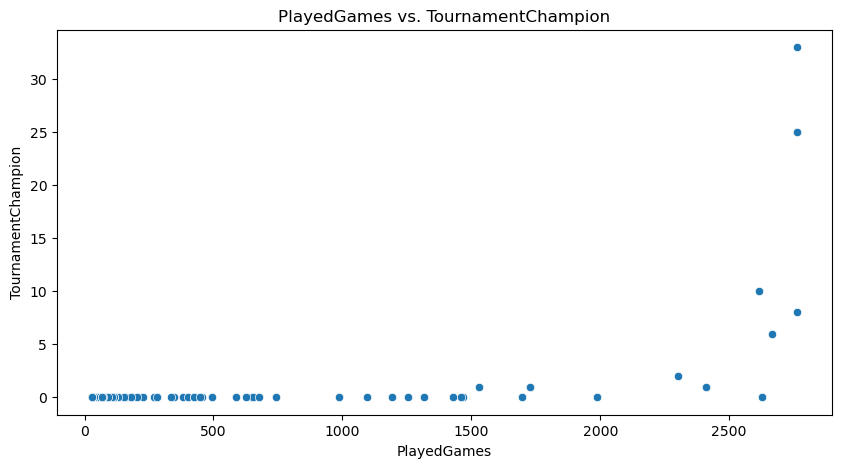

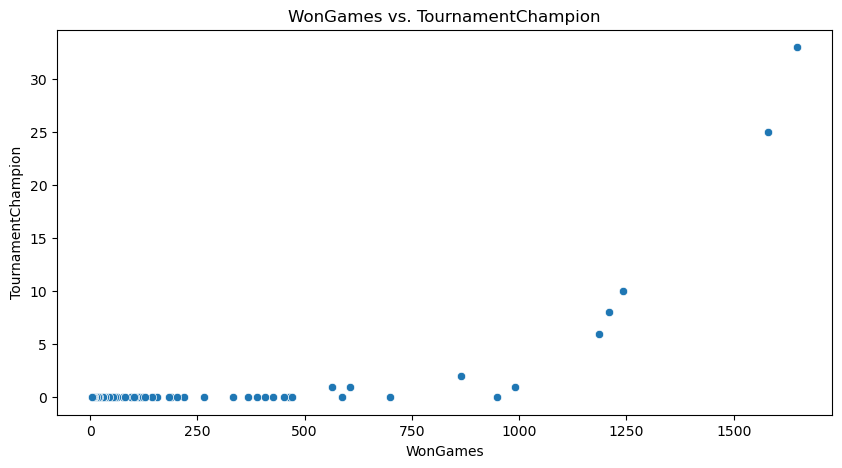

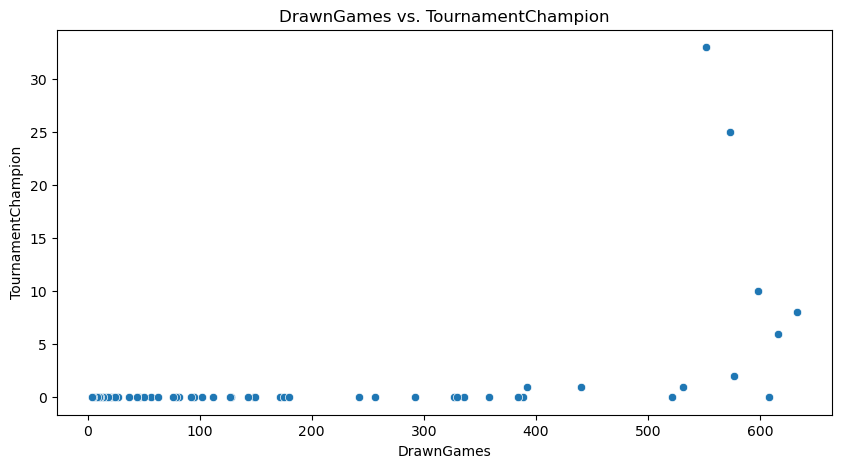

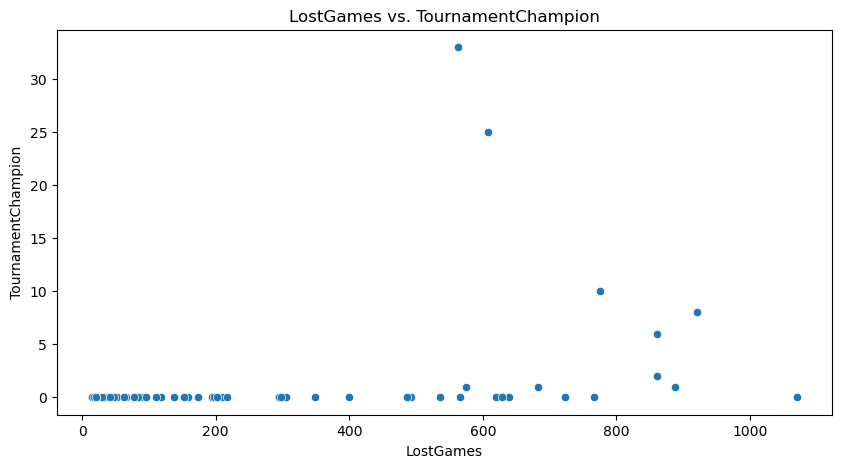

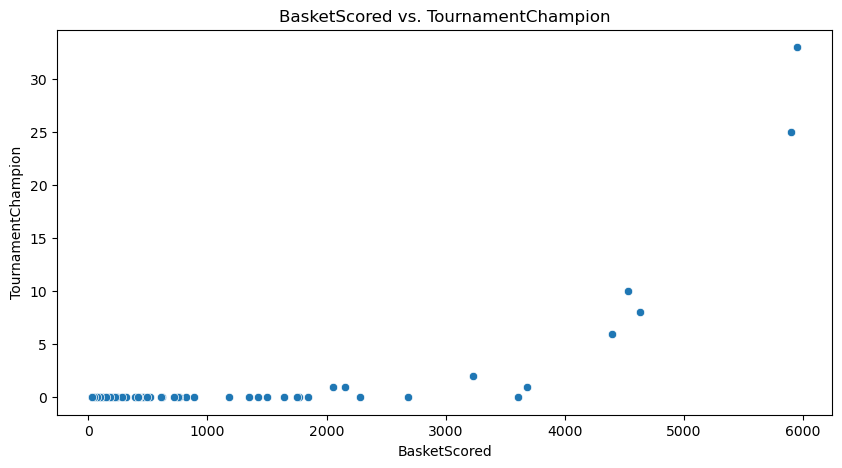

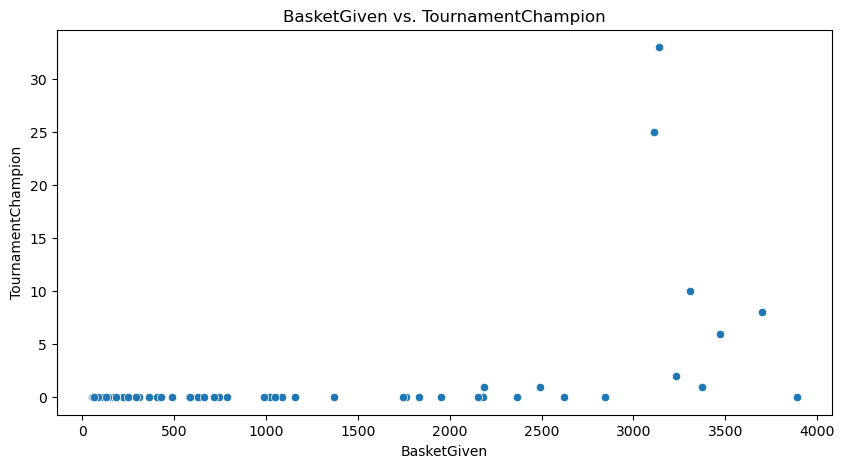

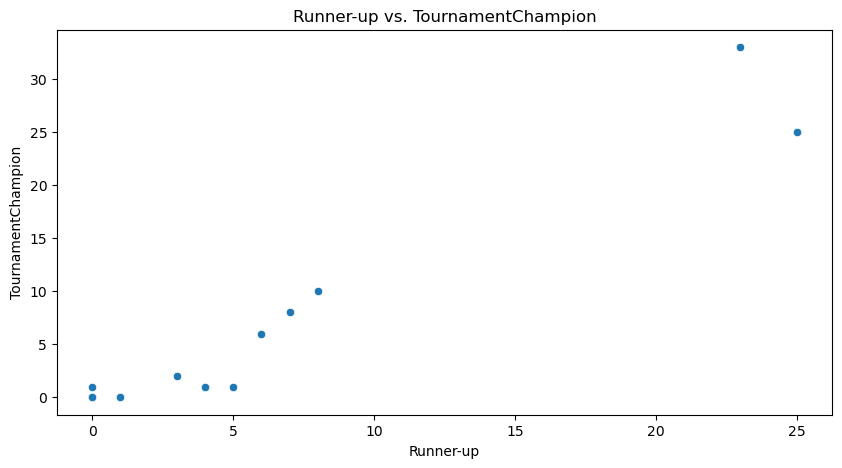

In [123]:
# 3. Scatter plot of 'Score' vs 'WonGames'
for i in a:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=i, y='TournamentChampion', data=df)
    plt.title(i+' vs. TournamentChampion')
    plt.xlabel(i)
    plt.ylabel('TournamentChampion')
    plt.show()

* From all the plots above we can infer that in the given data when the value in every single column is increasing the probability of a team winning the championship is also increasing

 ### 4. Correlation heatmap of numeric features

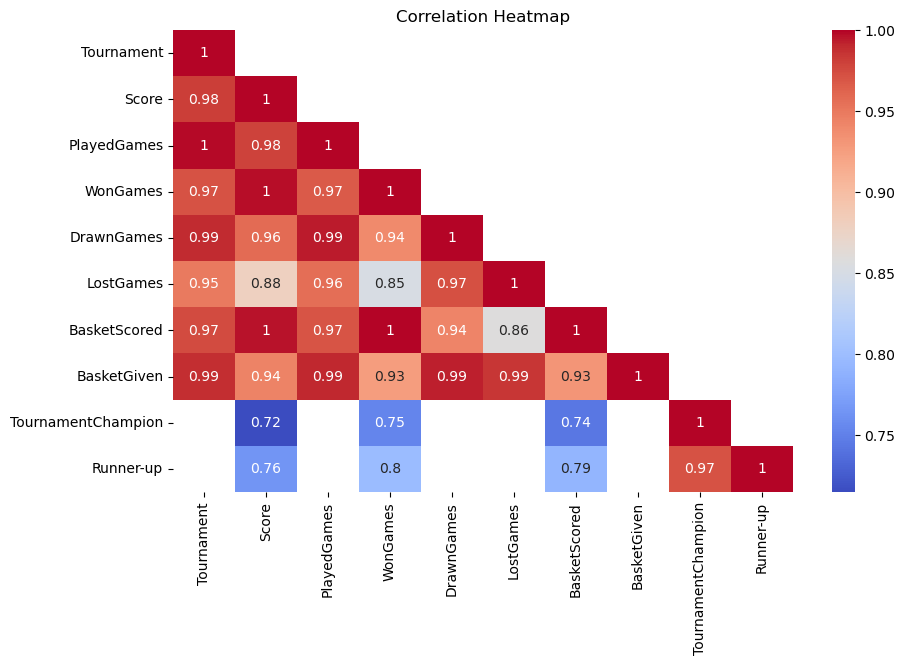

In [124]:
correlation_matrix = df.corr()[abs((df.corr())>0.65)]

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',mask=np.triu(correlation_matrix,+1))
plt.title('Correlation Heatmap')
plt.show()

* From the heatmap we can infer that there is high multi-correltion between the variables

## Multivariate Analysis

* Perform clustering analysis to group teams with similar performance characteristics.
* Create a time-series analysis to track the performance of teams over the years.

### 5. Pairplot for multiple numeric features

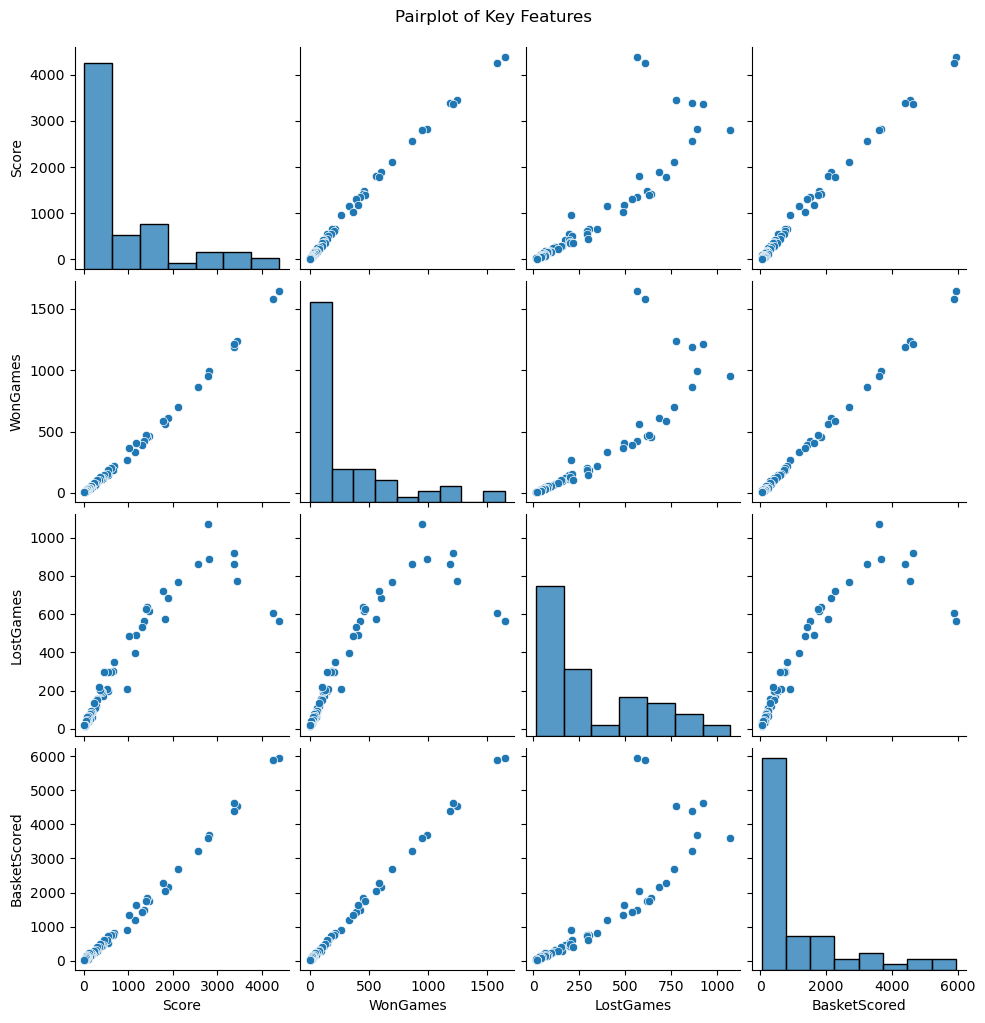

In [125]:
sns.pairplot(df[['Score', 'WonGames', 'LostGames', 'BasketScored']])
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

## Feature engineering

###### 1. Creating a new column named BasketDifference using BasketScored and BasketGiven

In [126]:
df["BasketDifference"] = df["BasketScored"]-df["BasketGiven"]

###### 2. Creating  a new column named Win Percentage using WonGames and PlayedGames

In [127]:
df["Win Percentage"] = (df["WonGames"]/df["PlayedGames"])*100

###### 3. Creating  a new column named Loss Percentage using WonGames and PlayedGames

In [128]:
df["Loss Percentage"] = (df["LostGames"]/df["PlayedGames"])*100

###### 4. Creating a new column named BasketScoredPerGame using BasketScored and PlayedGames

In [129]:
df["BasketScoredPerGame"] = df["BasketScored"]/df["PlayedGames"]

###### 5. Creating a new column named BasketGivenPerGame using BasketGiven and PlayedGames

In [130]:
df["BasketGivenPerGame"] = df["BasketGiven"]/df["PlayedGames"]

## Statistical Analyscis

###### Num Vs Num

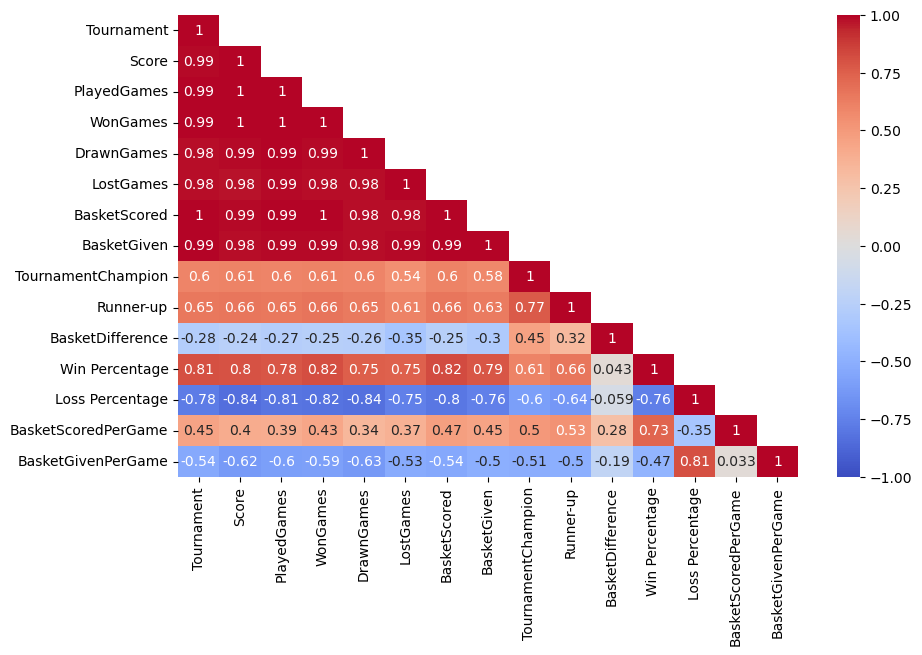

In [137]:
sns.heatmap(df.corr(method="spearman"),annot=True,vmin=-1,vmax=1,cmap='coolwarm',mask=np.triu(df.corr(method="spearman"),+1))
plt.show()

* From the corelation matrix we can see that if the values columns Tournament,Score,PlayedGames,WonGames,BasketScored increases the chances of a team winning the tournament also increases
* But in this dataset it also shows that if the values of the columns LostGames,BasketGiven increases the chances of a team winning the tournament also increases
* But we know that it is not true because a teams chances of winning increases when number of losses for a team decreases
* But here it is opposite because in the given dataset not all teams have started playing from the same year and because of that not all the teams have played equal number of games.
* This creates a bias in the data.

## Conclusion

##    Insights:
1. Teams with a higher historical position held (HighestPositionHeld) are usually strong contenders.
2. All the columns have nearly high correlation with the variable TournamentChampion
3. And Teams with more championships (TournamentChampion) may be more attractive for partnerships.
 #### These insights can be used to recommend teams for potential partnerships or deals.

* To find the best team from the given dataset we can sort the entire date first by the column HighestPositionHeld and if more than one team have the HighestPositionHeld as one then we can sort it based on the column TournamentChampion. But before that we need to concat the team column back to the data set

In [138]:
df1 = pd.concat([team,df],axis=1)

In [139]:
df1.sort_values(by=["HighestPositionHeld","TournamentChampion"],ascending=[True,False])

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,HighestPositionHeld,BasketDifference,Win Percentage,Loss Percentage,BasketScoredPerGame,BasketGivenPerGame
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1,2807,59.630702,20.383780,2.153150,1.136857
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1,2786,57.241130,22.013034,2.136133,1.127444
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1,1225,47.475134,29.648049,1.734507,1.265876
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1,931,43.772629,33.309196,1.676684,1.339609
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1,929,44.557057,32.319820,1.650901,1.302177
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1,-2,37.532580,37.402259,1.402259,1.403128
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1,307,41.112957,36.835548,1.528239,1.400748
9,Team 10,51,1884,1728,606,440,682,2159,2492,1,0,1,-333,35.069444,39.467593,1.249421,1.442130
10,Team 11,45,1814,1530,563,392,575,2052,2188,1,5,1,-136,36.797386,37.581699,1.341176,1.430065
8,Team 9,58,2109,1986,698,522,766,2683,2847,0,1,2,-164,35.146022,38.569990,1.350957,1.433535


### Conclusion

* From the above we can see that totaly 9 teams have the HighestPositionHeld as 1. But from this nine teams only Team 1 (First-33 Second-23) and Team 2 (First-25 Second-25) are dominating the tournament so far. So the Company X can approch Team 1 or Team 2 which will be a deal win for them. If the Company X wants do somthing different they can approch Team 21 as it is an upcoming team in this tournament because inspite of playing lesser number of tournament(17), lesser number of games(646) and and finishing in the second position only one time they are in the top ten best team (minimum games played 500).
1. The team is in ranked 7th based BasketDifference (Least)
2. The team is in ranked 6th based Win Percentage (Most)
3. The team is in ranked 4th based Loss Percentage (Least)
4. The team is in ranked 8th based BasketScoredPerGame (Most)
5. The team is in ranked 3th based BasketGivenPerGame(Least)
* Based on the EDA and the list of above mentioned outcomes it is evident that the Company X can unanimously select Team 21. This can ensure win-win situation for both company X and the Team 21. And this can also increase the Company X's profit exponentially